# io module examples

In this module we demonstrate Pymagicc's io capabilities.

In [1]:
# NBVAL_IGNORE_OUTPUT
from os import listdir
from os.path import join, dirname
from pprint import pprint

import pandas as pd
import pymagicc
from pymagicc.io import MAGICCData, read_cfg_file, NoReaderWriterError

import expectexception

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


In [2]:
import matplotlib.pyplot as plt

plt.style.use("bmh")
%matplotlib inline

In [3]:
MAGICC6_DIR = join("..", "pymagicc", "MAGICC6", "run")
TEST_DATA_DIR = join("..", "tests", "test_data")

## Read files

`MAGICCData` is the key object in Pymagicc's io module. This object allows us to easily read/write MAGICC input files. Its `__init__` docstring explains how a `MAGICCData` instance can be initialised.

In [4]:
print(MAGICCData.__init__.__doc__)


        Initialise a MAGICCData instance

        Here we provide a brief over of inputs, for more details
        see :class:`scmdata.ScmRun`.

        Parameters
        ----------
        data: pd.DataFrame, pd.Series, np.ndarray or string
            A pd.DataFrame or data file, or a numpy array of timeseries data if `columns` is specified.
            If a string is passed, data will be attempted to be read from file.

        columns: dict
            Dictionary to use to write the metadata for each timeseries in data. MAGICCData will
            also attempt to infer values from data. Any values in columns will be used in
            preference to any values found in data. The default value for "model", "scenario"
            and "climate_model" is "unspecified". See :class:`scmdata.ScmRun` for details.

        kwargs:
            Additional parameters passed to `pyam.core.read_files` to read non-standard files.
        


Here we load a file from disk and tell MAGICCData to set the scenario column to "Historical".

In [5]:
# NBVAL_IGNORE_OUTPUT
mdata = MAGICCData(
    join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"),
    columns={"scenario": ["Historical"]},
)
mdata.head()

time                                                                                                         1765-01-01  \
scenario   variable                                   todo unit      region       model       climate_model               
Historical Emissions|CO2|MAGICC Fossil and Industrial SET  Gt C / yr World|R5OECD unspecified unspecified         0.003   
                                                                     World|R5REF  unspecified unspecified         0.000   
                                                                     World|R5ASIA unspecified unspecified         0.000   
                                                                     World|R5MAF  unspecified unspecified         0.000   
                                                                     World|R5LAM  unspecified unspecified         0.000   

time                                                                                                         1766-01-01  \
scenario   variable                                   todo unit      region       model       climate_model               
Historical Emissions|CO2|MAGICC Fossil and Industrial SET  Gt C / yr World|R5OECD unspecified unspecified         0.003   
                                                                     World|R5REF  unspecified unspecified         0.000   
                                                                     World|R5ASIA unspecified unspecified         0.000   
                                                                     World|R5MAF  unspecified unspecified         0.000   
                                                                     World|R5LAM  unspecified unspecified         0.000   

time                                                                                                         1767-01-01  \
scenario   variable                                   todo unit      region       model       climate_model               
Historical Emissions|CO2|MAGICC Fossil and Industrial SET  Gt C / yr World|R5OECD unspecified unspecified         0.003   
                                                                     World|R5REF  unspecified unspecified         0.000   
                                                                     World|R5ASIA unspecified unspecified         0.000   
                                                                     World|R5MAF  unspecified unspecified         0.000   
                                                                     World|R5LAM  unspecified unspecified         0.000   

time                                                                                                         1768-01-01  \
scenario   variable                                   todo unit      region       model       climate_model               
Historical Emissions|CO2|MAGICC Fossil and Industrial SET  Gt C / yr World|R5OECD unspecified unspecified         0.003   
                                                                     World|R5REF  unspecified unspecified         0.000   
                                                                     World|R5ASIA unspecified unspecified         0.000   
                                                                     World|R5MAF  unspecified unspecified         0.000   
                                                                     World|R5LAM  unspecified unspecified         0.000   

time                                                                                                         1769-01-01  \
scenario   variable                                   todo unit      region       model       climate_model               
Historical Emissions|CO2|MAGICC Fossil and Industrial SET  Gt C / yr World|R5OECD unspecified unspecified         0.003   
                                                                     World|R5REF  unspecified unspecified         0.000   
                                                            

Any metadata which is found in the file is included in `MAGICCData`'s `metadata` attribute.

In [6]:
pprint(mdata.metadata)

{'contact': 'Base year emissions inventories: Steve Smith (ssmith@pnl.gov) and '
            'Jean-Francois Lamarque (Jean-Francois.Lamarque@noaa.gov); RCP '
            '3-PD (IMAGE): Detlef van Vuuren (detlef.vanvuuren@pbl.nl); RCP '
            '4.5 (MiniCAM): Allison Thomson (Allison.Thomson@pnl.gov); RCP 6.0 '
            '(AIM): Toshihiko Masui (masui@nies.go.jp); RCP 8.5 (MESSAGE): '
            'Keywan Riahi (riahi@iiasa.ac.at); Concentrations & Forcing '
            'compilation: Malte Meinshausen (malte.meinshausen@pik-potsdam.de)',
 'data': 'Historical fossil&industrial CO2 (CO2I) Emissions '
         '(HISTRCP_CO2I_EMIS)',
 'header': 'RCPTOOL - MAGICC 6.X DATA FILE\n'
           'VERSION:   ALPHA - FIRST DRAFT - PRIMAP xls file written on 02 Sep '
           '2009, 17:04:37',
 'source': 'RCP data as presented on '
           'http://www.iiasa.ac.at/web-apps/tnt/RcpDb, August 2009'}


## Filtering

As `MAGICCData` subclasses OpenSCM's `scmdata.ScmRun`, we get access to all of its useful capabilities, for example filtering.

In [7]:
# NBVAL_IGNORE_OUTPUT
mdata.filter(region="*R5ASIA").head()

,,,,,,time,1765-01-01,1766-01-01,1767-01-01,1768-01-01,1769-01-01,1770-01-01,1771-01-01,1772-01-01,1773-01-01,1774-01-01,...,1997-01-01,1998-01-01,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01
scenario,variable,todo,unit,region,model,climate_model,,,,,,,,,,,,,,,,,,,,,
Historical,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,unspecified,unspecified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.76053,1.648214,1.712315,1.768203,1.849029,1.922234,2.142218,2.417585,2.608225,2.795696


### Reading SCEN files

We can also read SCEN files. These are particularly tricky as the underlying data format is unique.

In [8]:
# NBVAL_IGNORE_OUTPUT
mdata = mdata.append(
    join(MAGICC6_DIR, "RCP45.SCEN"), columns={"model": ["MiniCAM"]},
)
mdata.head()

time                                                                                                         1765-01-01 00:00:00  \
scenario   variable                                   todo unit      region       model       climate_model                        
Historical Emissions|CO2|MAGICC Fossil and Industrial SET  Gt C / yr World|R5OECD unspecified unspecified                  0.003   
                                                                     World|R5REF  unspecified unspecified                  0.000   
                                                                     World|R5ASIA unspecified unspecified                  0.000   
                                                                     World|R5MAF  unspecified unspecified                  0.000   
                                                                     World|R5LAM  unspecified unspecified                  0.000   

time                                                                                                         1766-01-01 00:00:00  \
scenario   variable                                   todo unit      region       model       climate_model                        
Historical Emissions|CO2|MAGICC Fossil and Industrial SET  Gt C / yr World|R5OECD unspecified unspecified                  0.003   
                                                                     World|R5REF  unspecified unspecified                  0.000   
                                                                     World|R5ASIA unspecified unspecified                  0.000   
                                                                     World|R5MAF  unspecified unspecified                  0.000   
                                                                     World|R5LAM  unspecified unspecified                  0.000   

time                                                                                                         1767-01-01 00:00:00  \
scenario   variable                                   todo unit      region       model       climate_model                        
Historical Emissions|CO2|MAGICC Fossil and Industrial SET  Gt C / yr World|R5OECD unspecified unspecified                  0.003   
                                                                     World|R5REF  unspecified unspecified                  0.000   
                                                                     World|R5ASIA unspecified unspecified                  0.000   
                                                                     World|R5MAF  unspecified unspecified                  0.000   
                                                                     World|R5LAM  unspecified unspecified                  0.000   

time                                                                                                         1768-01-01 00:00:00  \
scenario   variable                                   todo unit      region       model       climate_model                        
Historical Emissions|CO2|MAGICC Fossil and Industrial SET  Gt C / yr World|R5OECD unspecified unspecified                  0.003   
                                                                     World|R5REF  unspecified unspecified                  0.000   
                                                                     World|R5ASIA unspecified unspecified                  0.000   
                                                                     World|R5MAF  unspecified unspecified                  0.000   
                                                                     World|R5LAM  unspecified unspecified                  0.000   

time                                                                                                         1769-01-01 00:00:00  \
scenario   variable                                   todo unit      region       model       climate_model                        
Historical Emissions|CO2|MAGICC Foss

In [9]:
# NBVAL_IGNORE_OUTPUT
mdata.filter(variable="*BC", region="*ASIA").head()

,,,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,...,2250-01-01 00:00:00,2260-01-01 00:00:00,2270-01-01 00:00:00,2280-01-01 00:00:00,2290-01-01 00:00:00,2300-01-01 00:00:00,2350-01-01 00:00:00,2400-01-01 00:00:00,2450-01-01 00:00:00,2500-01-01 00:00:00
model,variable,unit,todo,region,scenario,climate_model,,,,,,,,,,,,,,,,,,,,,
MiniCAM,Emissions|BC,Mt BC / yr,SET,World|R5ASIA,RCP45,unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791,0.9791


### Reading RCP data files

We can also read the RCP data files provided at http://www.pik-potsdam.de/~mmalte/rcps/. These are also tricky as the underlying data format is unique. 

In the cell below we read a file from disk and we set the model column to be "IMAGE", the scenario column to be "RCP26" and the climate_model column to be "MAGICC6".

<div class="alert alert-danger">
  <strong>Danger!</strong> As Pymagicc (and OpenSCM) are closely related to Pyam, we always use the word "model" to refer to integrated assessment model. Information related to climate models should always go in the "climate_model" column.
</div>

In [10]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data = MAGICCData(
    join(TEST_DATA_DIR, "RCP3PD_EMISSIONS.DAT"),
    columns={
        "model": ["IMAGE"],
        "scenario": ["RCP26"],
        "climate_model": ["MAGICC6"],
    },
)
rcp_online_data.head()

time                                                                                              1765-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET                 0.003   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET                 0.000   
                             Mt CH4 / yr  Emissions|CH4                              World  SET                 0.000   
                             Mt N2ON / yr Emissions|N2O                              World  SET                 0.000   
                             Mt S / yr    Emissions|SOx                              World  SET                 0.000   

time                                                                                              1766-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.005338   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              1.963262   
                             Mt N2ON / yr Emissions|N2O                              World  SET              0.005191   
                             Mt S / yr    Emissions|SOx                              World  SET              0.098883   

time                                                                                              1767-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.010677   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              2.436448   
                             Mt N2ON / yr Emissions|N2O                              World  SET              0.010117   
                             Mt S / yr    Emissions|SOx                              World  SET              0.116306   

time                                                                                              1768-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.016015   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              2.911105   
                             Mt N2ON / yr Emissions|N2O                              World  SET              0.015043   
                             Mt S / yr    Emissions|SOx                              World  SET              0.133811   

time                                                                                              1769-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.021353   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              3.387278   
   

In [11]:
rcp_online_data.meta[["variable", "unit"]]

,variable,unit
849,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr
850,Emissions|CO2|MAGICC AFOLU,Gt C / yr
851,Emissions|CH4,Mt CH4 / yr
852,Emissions|N2O,Mt N2ON / yr
853,Emissions|SOx,Mt S / yr
854,Emissions|CO,Mt CO / yr
855,Emissions|NMVOC,Mt NMVOC / yr
856,Emissions|NOx,Mt N / yr
857,Emissions|BC,Mt BC / yr
858,Emissions|OC,Mt OC / yr


### Append

We can then append other RCP3PD data, e.g. concentrations, to the same `MAGICCData` instance using its `append` method. 

In [12]:
print(rcp_online_data.append.__doc__)


        Append additional data to the current dataframe.

        For details, see :func:`run_append`.

        Parameters
        ----------
        other
            Data (in format which can be cast to :class:`ScmRun`) to append

        inplace
            If ``True``, append data in place and return ``None``. Otherwise, return a
            new :class:`ScmRun` instance with the appended data.

        duplicate_msg
            If ``True``, raise a ``NonUniqueMetadataError`` error so the user
            can see the duplicate timeseries. If ``False``, take the average
            and do not raise a warning or error. If ``"warn"``, raise a
            warning if duplicate data is detected.

        metadata
            If not ``None``, override the metadata of the resulting :obj:`ScmRun` with ``metadata``.
            Otherwise, the metadata for the runs are merged. In the case where there are duplicate
            metadata keys, the values from the first run are used.

        **k

In this case we want to append a file from disk and we want the appended file's model column to be "IMAGE", its scenario column to be "RCP26" and its climate_model column to be "MAGICC6".

In [13]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_CONCENTRATIONS.DAT"),
    columns={
        "model": ["IMAGE"],
        "scenario": ["RCP26"],
        "climate_model": ["MAGICC6"],
    },
    inplace=True,
)
rcp_online_data.head()

time                                                                                              1765-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET                 0.003   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET                 0.000   
                             Mt CH4 / yr  Emissions|CH4                              World  SET                 0.000   
                             Mt N2ON / yr Emissions|N2O                              World  SET                 0.000   
                             Mt S / yr    Emissions|SOx                              World  SET                 0.000   

time                                                                                              1766-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.005338   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              1.963262   
                             Mt N2ON / yr Emissions|N2O                              World  SET              0.005191   
                             Mt S / yr    Emissions|SOx                              World  SET              0.098883   

time                                                                                              1767-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.010677   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              2.436448   
                             Mt N2ON / yr Emissions|N2O                              World  SET              0.010117   
                             Mt S / yr    Emissions|SOx                              World  SET              0.116306   

time                                                                                              1768-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.016015   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              2.911105   
                             Mt N2ON / yr Emissions|N2O                              World  SET              0.015043   
                             Mt S / yr    Emissions|SOx                              World  SET              0.133811   

time                                                                                              1769-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.021353   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              3.387278   
   

In [14]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data.meta[["variable", "unit"]]

,variable,unit
849,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr
850,Emissions|CO2|MAGICC AFOLU,Gt C / yr
851,Emissions|CH4,Mt CH4 / yr
852,Emissions|N2O,Mt N2ON / yr
853,Emissions|SOx,Mt S / yr
...,...,...
918,Atmospheric Concentrations|Halon1202,ppt
919,Atmospheric Concentrations|Halon1301,ppt
920,Atmospheric Concentrations|Halon2402,ppt
921,Atmospheric Concentrations|CH3Br,ppt


We can also append the radiative forcing information.

In [15]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data = rcp_online_data.append(
    join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_RADFORCING.DAT"),
    columns={
        "model": ["IMAGE"],
        "scenario": ["RCP26"],
        "climate_model": ["MAGICC6"],
    },
)
rcp_online_data.head()

time                                                                                              1765-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET                 0.003   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET                 0.000   
                             Mt CH4 / yr  Emissions|CH4                              World  SET                 0.000   
                             Mt N2ON / yr Emissions|N2O                              World  SET                 0.000   
                             Mt S / yr    Emissions|SOx                              World  SET                 0.000   

time                                                                                              1766-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.005338   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              1.963262   
                             Mt N2ON / yr Emissions|N2O                              World  SET              0.005191   
                             Mt S / yr    Emissions|SOx                              World  SET              0.098883   

time                                                                                              1767-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.010677   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              2.436448   
                             Mt N2ON / yr Emissions|N2O                              World  SET              0.010117   
                             Mt S / yr    Emissions|SOx                              World  SET              0.116306   

time                                                                                              1768-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.016015   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              2.911105   
                             Mt N2ON / yr Emissions|N2O                              World  SET              0.015043   
                             Mt S / yr    Emissions|SOx                              World  SET              0.133811   

time                                                                                              1769-01-01 00:00:00  \
model scenario climate_model unit         variable                                   region todo                        
IMAGE RCP26    MAGICC6       Gt C / yr    Emissions|CO2|MAGICC Fossil and Industrial World  SET              0.003000   
                                          Emissions|CO2|MAGICC AFOLU                 World  SET              0.021353   
                             Mt CH4 / yr  Emissions|CH4                              World  SET              3.387278   
   

In [16]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data.meta[["variable", "unit"]]

,variable,unit
849,Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr
850,Emissions|CO2|MAGICC AFOLU,Gt C / yr
851,Emissions|CH4,Mt CH4 / yr
852,Emissions|N2O,Mt N2ON / yr
853,Emissions|SOx,Mt S / yr
...,...,...
971,Radiative Forcing|Stratospheric Ozone,W / m^2
972,Radiative Forcing|Tropospheric Ozone,W / m^2
973,Radiative Forcing|CH4 Oxidation Stratospheric H2O,W / m^2
974,Radiative Forcing|Land-use Change,W / m^2


Making the most of `MAGICCData`'s data analysis features can allow all sorts of plots to be made with little difficulty.

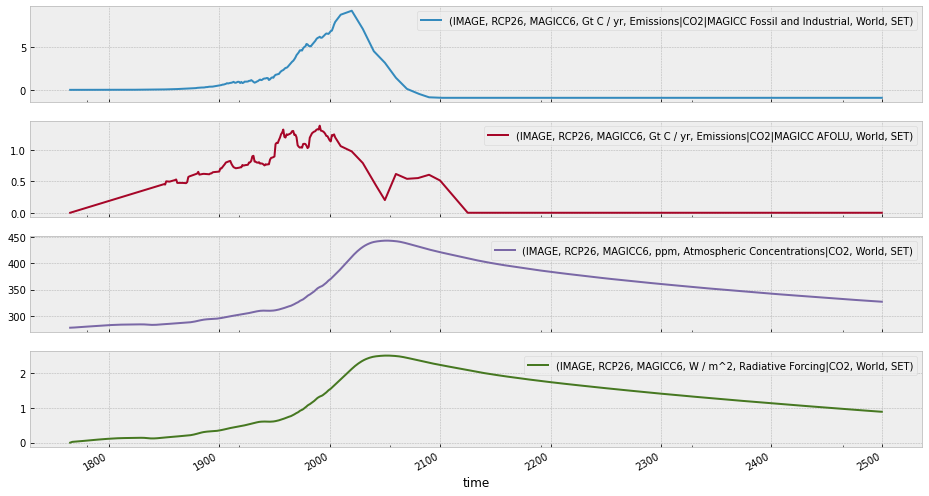

In [17]:
# NBVAL_IGNORE_OUTPUT
rcp_online_data.filter(variable="*CO2*", region="World").filter(
    variable="*Eq*", keep=False
).filter(variable="*,*", keep=False).timeseries().T.plot(
    subplots=True, figsize=(16, 9)
);

### Reading all files in run directory

The lines below show how you can read every file in the run directory into a dictionary, should you wish to.

In [18]:
all_run_files = {}

for file in listdir(MAGICC6_DIR):

    if file.endswith((".exe", ".MON")):
        continue
    elif file.endswith(".CFG"):
        all_run_files[file] = read_cfg_file(join(MAGICC6_DIR, file))
    else:
        all_run_files[file] = MAGICCData(join(MAGICC6_DIR, file))

In [19]:
sorted(all_run_files.keys())

['1PCTCO2_CO2_CONC.IN',
 'ABRUPT2XCO2_CO2_CONC.IN',
 'EDGAR_NOXB_EMIS.IN',
 'EDGAR_NOXI_EMIS.IN',
 'GISS_BCB_OT.IN',
 'GISS_BCB_RF.IN',
 'GISS_BCI_OT.IN',
 'GISS_BCI_RF.IN',
 'GISS_BCSNOW_RF.IN',
 'GISS_LANDUSE_RF.IN',
 'GISS_NOX_RF.IN',
 'GISS_OCB_OT.IN',
 'GISS_OCB_RF.IN',
 'GISS_OCI_OT.IN',
 'GISS_OCI_RF.IN',
 'GISS_OCN_OT.IN',
 'GISS_SOXI_OT.IN',
 'GISS_SOXNB_OT.IN',
 'GISS_SOX_RF.IN',
 'GISS_SS_OT.IN',
 'HISTRCP2009_SOLAR_RF.IN',
 'HISTRCP45SCP45to3PD_SOLAR_RF.IN',
 'HISTRCP45_SOLAR_RF.IN',
 'HISTRCP60_2300_SOLAR_RF.IN',
 'HISTRCP6SCP6to45_SOLAR_RF.IN',
 'HISTRCP6_SOLAR_RF.IN',
 'HISTRCP85_SOLAR_RF.IN',
 'HISTRCP_BCB_EMIS.IN',
 'HISTRCP_BCI_EMIS.IN',
 'HISTRCP_C2F6_CONC.IN',
 'HISTRCP_C2F6_EMIS.IN',
 'HISTRCP_C6F14I_EMIS.IN',
 'HISTRCP_C6F14_CONC.IN',
 'HISTRCP_C6F14_EMIS.IN',
 'HISTRCP_CF4_CONC.IN',
 'HISTRCP_CF4_EMIS.IN',
 'HISTRCP_CH4B_EMIS.IN',
 'HISTRCP_CH4I_EMIS.IN',
 'HISTRCP_CH4_CONC.IN',
 'HISTRCP_CO2B_EMIS.IN',
 'HISTRCP_CO2I_EMIS.IN',
 'HISTRCP_CO2_CONC.IN',
 'HISTRCP_C

In [20]:
all_run_files["SRESB2.SCEN"].head()

,,,,,,time,1990-01-01 00:00:00,2000-01-01 00:00:00,2010-01-01 00:00:00,2020-01-01 00:00:00,2030-01-01 00:00:00,2040-01-01 00:00:00,2050-01-01 00:00:00,2060-01-01 00:00:00,2070-01-01 00:00:00,2080-01-01 00:00:00,2090-01-01 00:00:00,2100-01-01 00:00:00
variable,unit,todo,region,scenario,model,climate_model,,,,,,,,,,,,
Emissions|CO2|MAGICC Fossil and Industrial,Gt C / yr,SET,World|ALM,B2_MESSAGE,unspecified,unspecified,0.7152,1.0116,1.2639,1.4831,1.8822,2.2423,2.6046,3.0441,3.2744,3.5528,3.7887,3.8444
Emissions|CO2|MAGICC AFOLU,Gt C / yr,SET,World|ALM,B2_MESSAGE,unspecified,unspecified,0.7321,0.8169,0.6338,0.4206,0.1234,0.0068,-0.1098,-0.1058,-0.1018,-0.1204,-0.1617,-0.2029
Emissions|CH4,Mt CH4 / yr,SET,World|ALM,B2_MESSAGE,unspecified,unspecified,76.7245,85.1631,94.4740,101.6967,111.8402,129.4583,148.7465,161.6487,175.2910,186.7285,192.6714,199.8942
Emissions|N2O,Mt N2ON / yr,SET,World|ALM,B2_MESSAGE,unspecified,unspecified,1.1778,1.2938,0.6886,0.6016,0.5458,0.5652,0.5841,0.6267,0.6686,0.7074,0.7425,0.7705
Emissions|SOx,Mt S / yr,SET,World|ALM,B2_MESSAGE,unspecified,unspecified,10.5377,12.7760,14.4000,15.2410,16.6818,17.8013,19.3640,20.0495,19.5599,19.0788,17.9626,17.1951


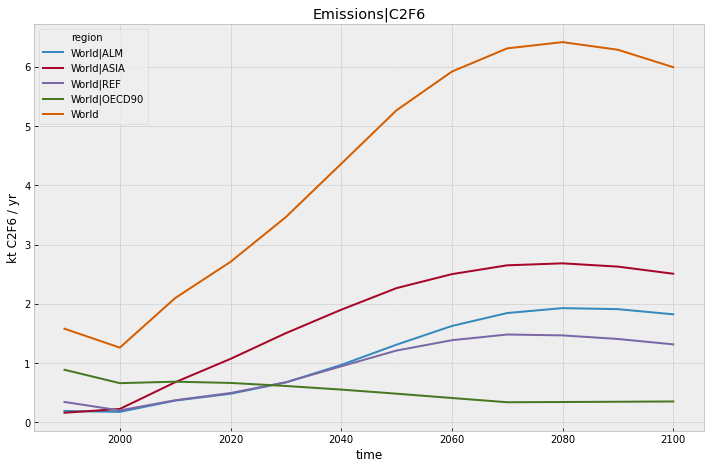

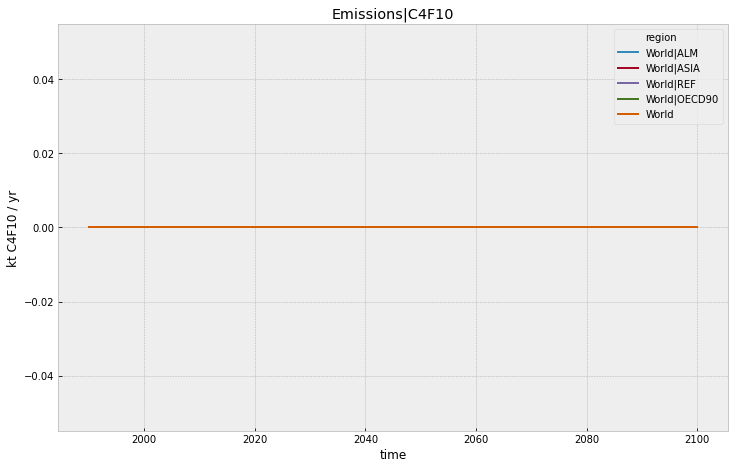

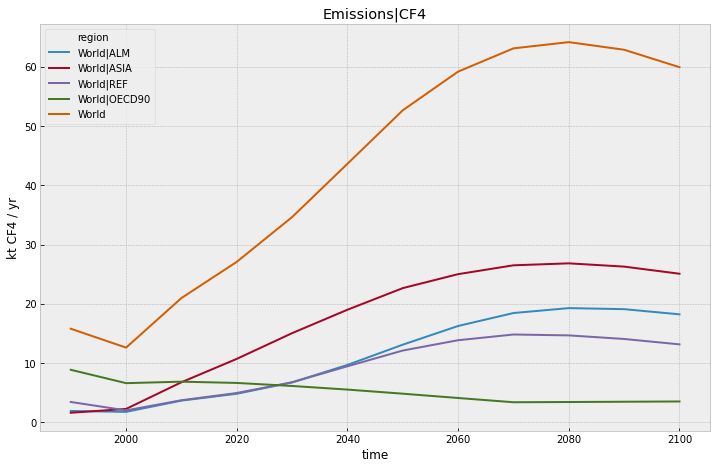

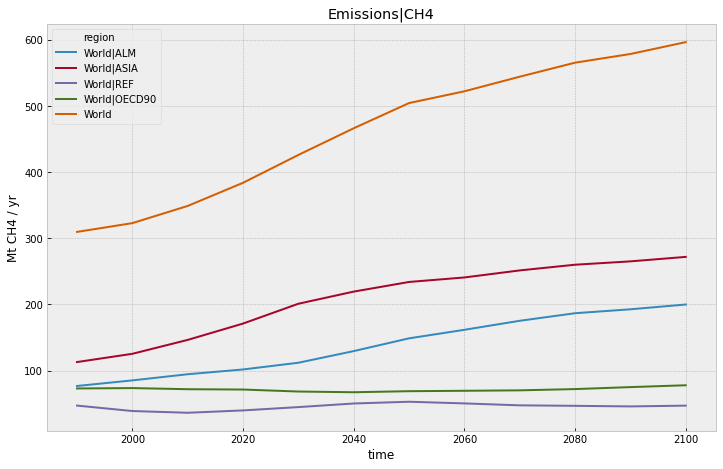

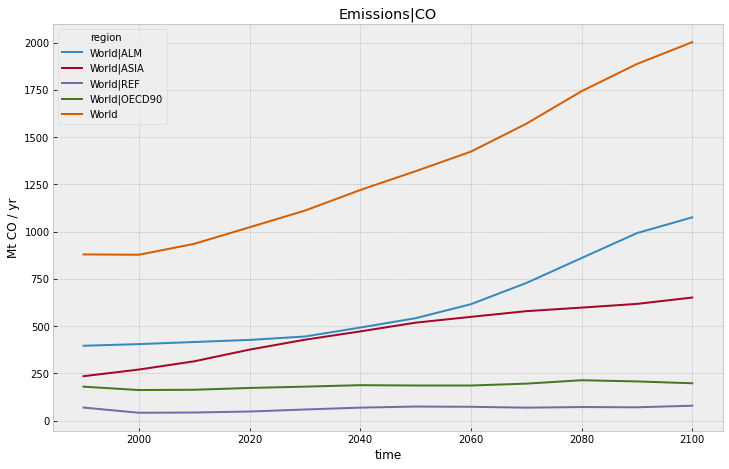

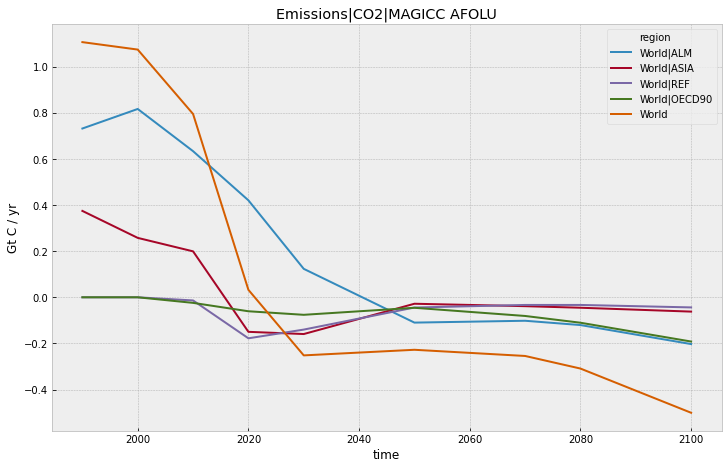

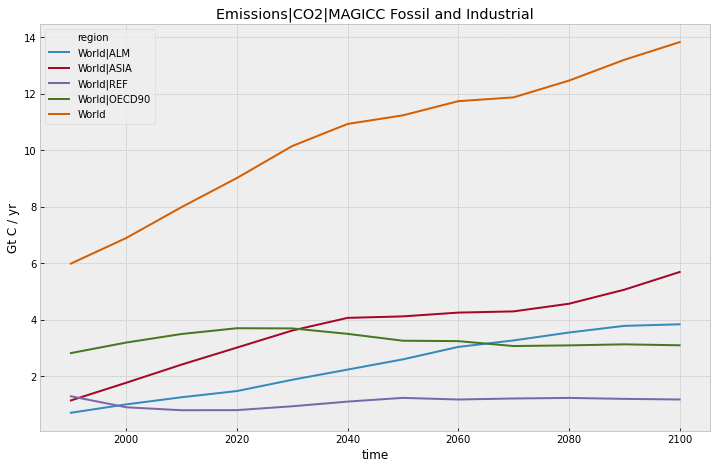

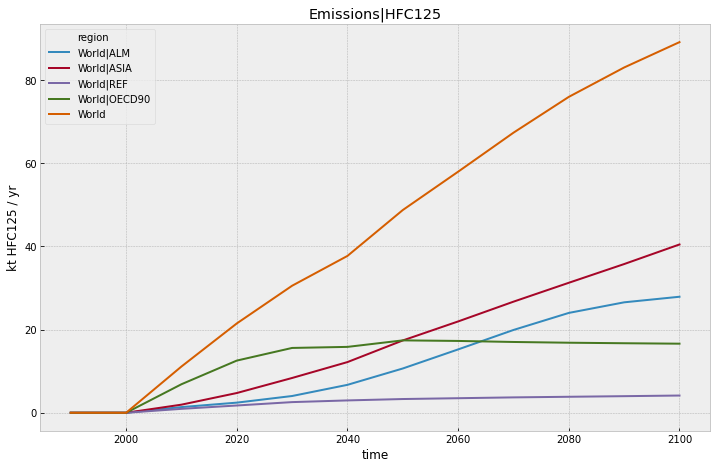

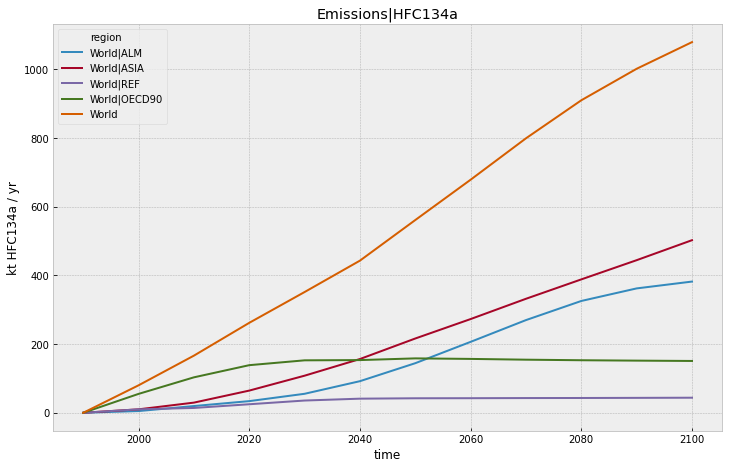

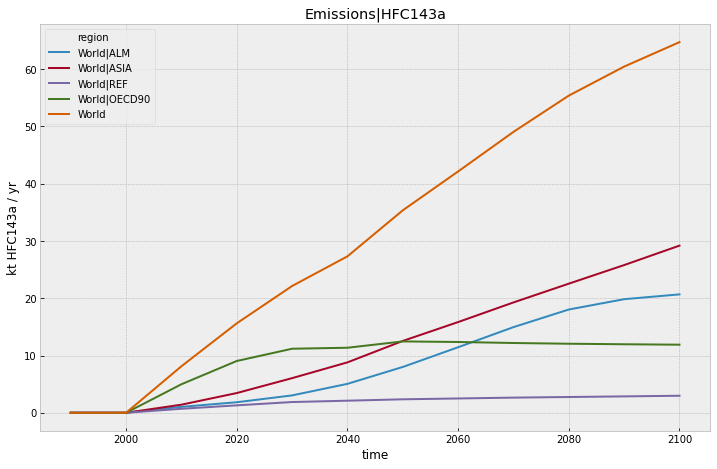

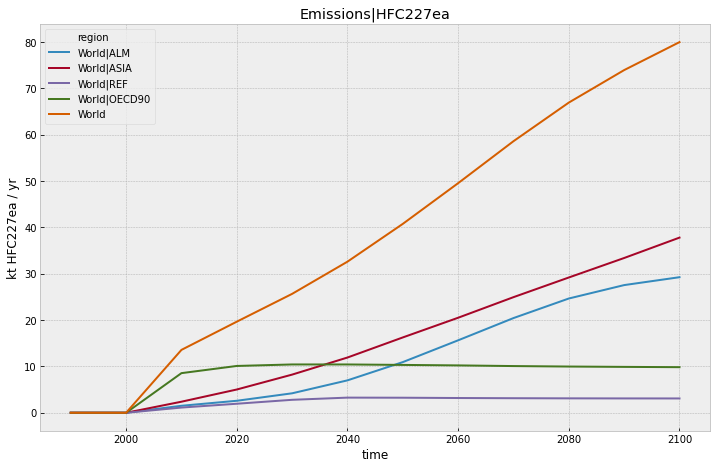

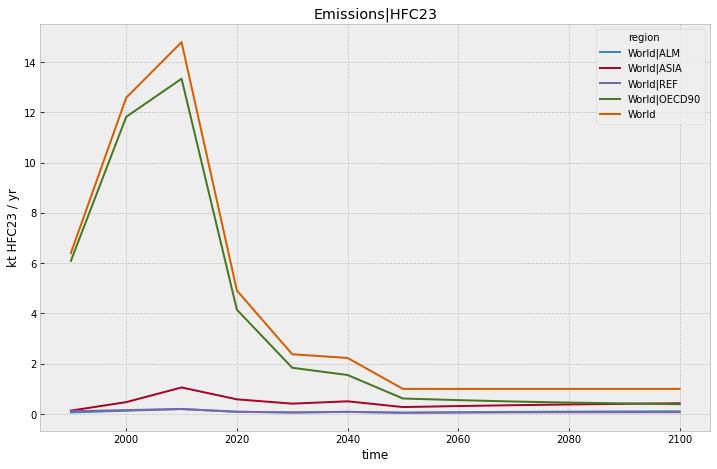

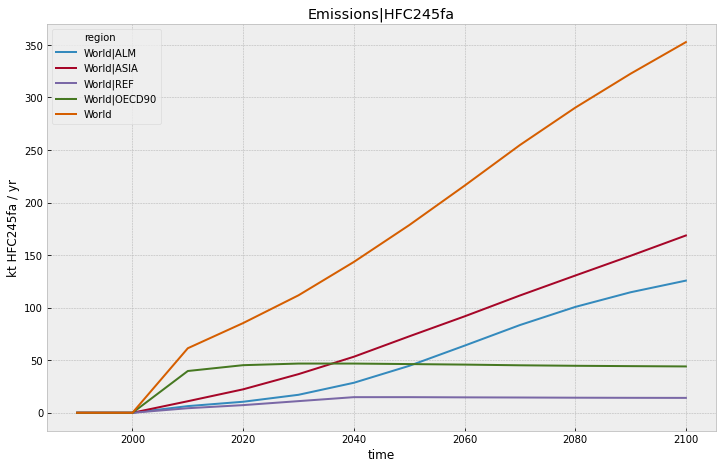

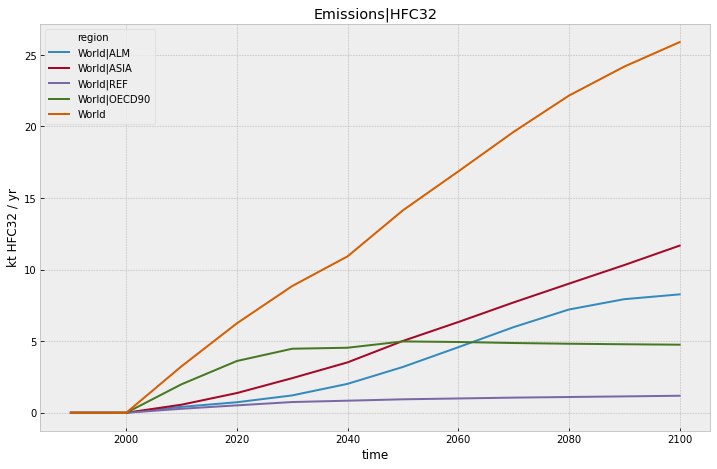

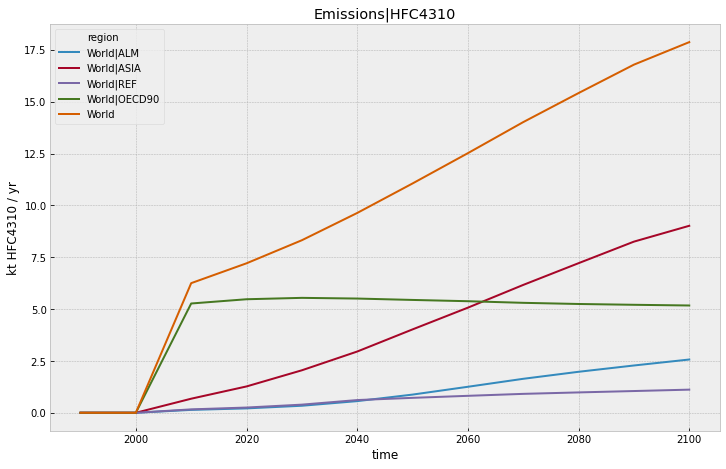

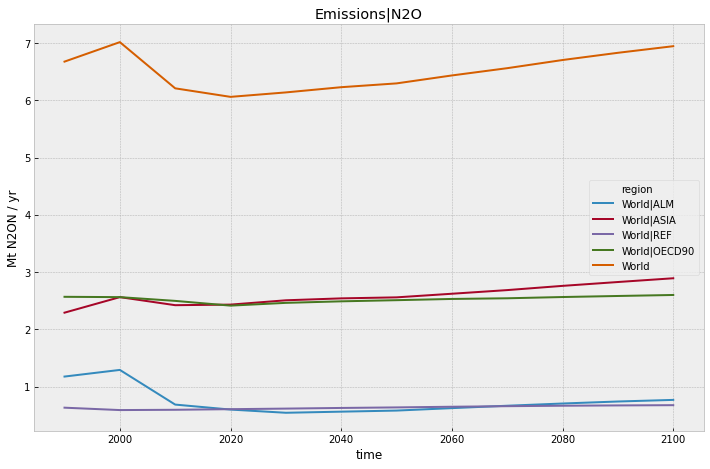

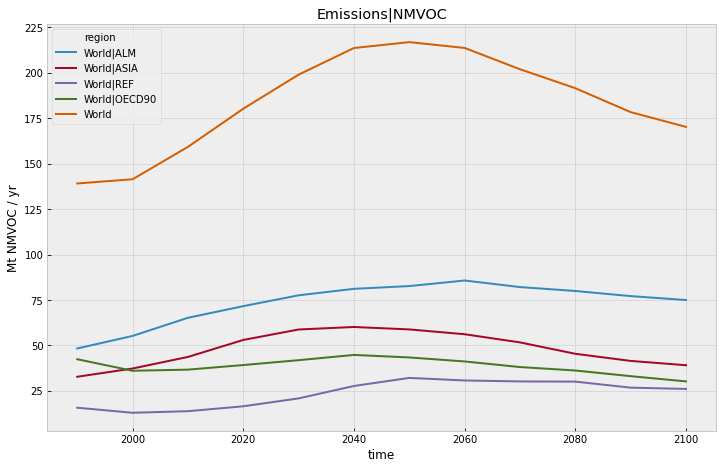

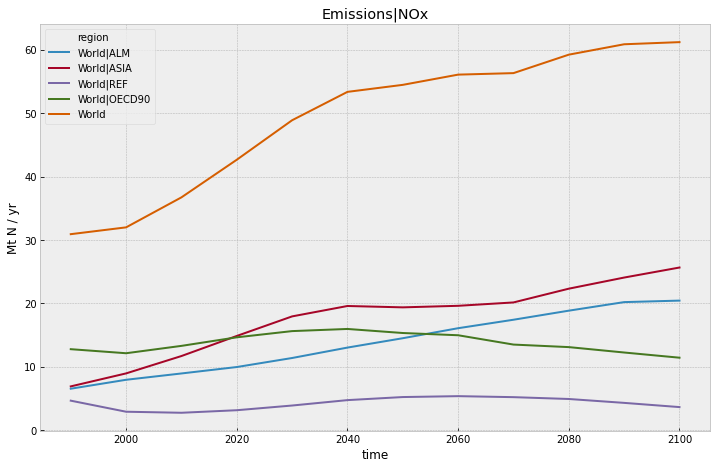

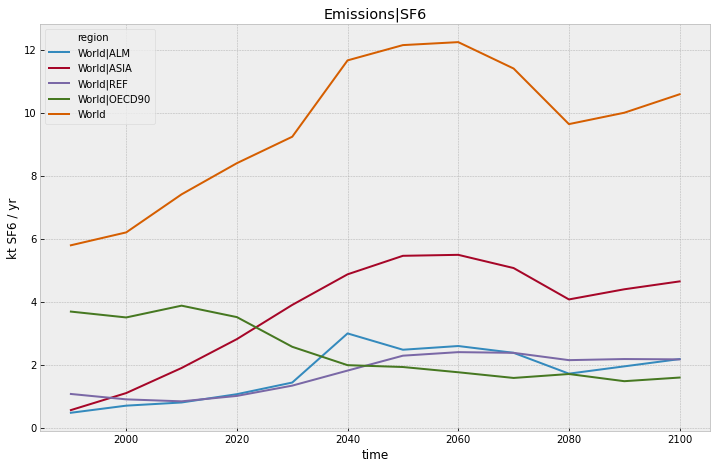

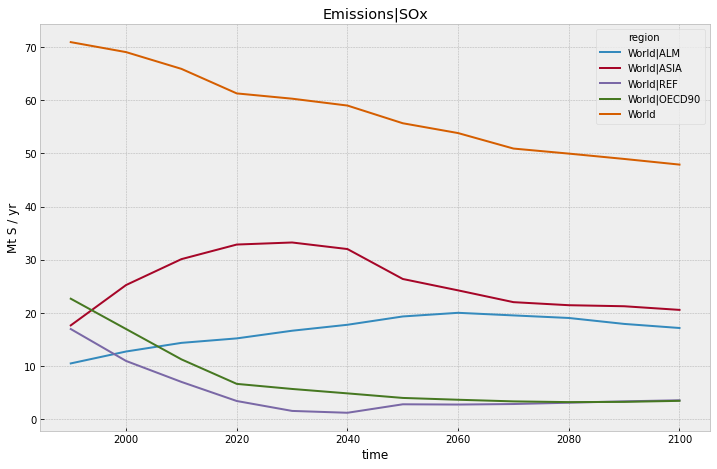

In [21]:
for g in all_run_files["SRESB2.SCEN"].groupby("variable"):
    plt.figure(figsize=(12, 7.5))
    g.lineplot(hue="region").set_title(g.get_unique_meta("variable", True))

## Writing files

Once you have your data in a `MAGICCData` instance, writing files is trivial. To write a file, you pass in the path you want to write the file to and the MAGICC version for which you want to write the file.

In [22]:
print(MAGICCData.write.__doc__)


        Write an input file to disk.

        For more information on file conventions, see :ref:`magicc_file_conventions`.

        Parameters
        ----------
        filepath : str
            Filepath of the file to write.

        magicc_version : int
            The MAGICC version for which we want to write files. MAGICC7 and MAGICC6
            namelists are incompatible hence we need to know which one we're writing
            for.
        


In [23]:
mdata = MAGICCData(join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"))
mdata.write("HISTEXAMPLE_CO2I_EMIS.IN", magicc_version=7)

mdata = MAGICCData(join(MAGICC6_DIR, "RCP45.SCEN"))
mdata.write("SCENEXAMPLE.SCEN", magicc_version=7)

However, note that the format to write in is determined by the filename. Hence you can't just use any filename, it has to follow MAGICC's internal conventions, see [the docs](https://pymagicc.readthedocs.io/en/latest/file_conventions.html). Our error messaging will hopefully make this slightly clearer.

In [24]:
%%expect_exception NoReaderWriterError
mdata.write("histexample.txt", magicc_version=7)

---------------------------------------------------------------------------
NoReaderWriterError                       Traceback (most recent call last)
<ipython-input-24-20ac4c194f29> in <module>
----> 1 mdata.write("histexample.txt", magicc_version=7)

~/code/uom/pymagicc/pymagicc/io/__init__.py in write(self, filepath, magicc_version)
    568             for.
    569         """
--> 570         writer = determine_tool(filepath, "writer")(magicc_version=magicc_version)
    571         writer.write(self, filepath)

~/code/uom/pymagicc/pymagicc/io/__init__.py in determine_tool(filepath, tool_to_get)
    247         )
    248 
--> 249     raise NoReaderWriterError(error_msg)
    250 
    251 

NoReaderWriterError: Couldn't find appropriate writer for histexample.txt.
The file must be one of the following types and the filepath must match its corresponding regular expression:
SCEN: ^.*\.SCEN$
SCEN7: ^.*\.SCEN7$
prn: ^.*\.prn$
EmisIn: ^.*\_EMIS.*\.IN$
ConcIn: ^.*\_CONC.*\.IN$
OpticalThickn